<a href="https://colab.research.google.com/github/viviennejuma/wk4core/blob/main/week4core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#PROBLEM STATEMENT
In France,postal codes are used to identify the location of a place. First two digits represent the district, and the last three are for subdivisions  neighborhood. The dataset provided has 104 distinct postal codes. Considering the blue cars that were taken and those that were returned which are the highest?

# HYPOTHESIS
The claim is that the blue cars taken are more than the ones returned.

#METRIC FOR SUCCESS
This project will be successful when we identify whether blue cars taken are more than the ones returned.

#Understanding the context
Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.



#Recording the Experimental Design
Defining the research question

Finding and dealing with outliers, anomalies, and missing data within the dataset.

Plot appropriate univariate and bivariate summaries recording our observations.

Implement the solution by performing hypothesis testing.

Challenge your solution by providing insights on how you can make improvements. Defining the research question

#Relevance of the data
THe data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). the dataset used was ranging from january to july of 2018 and is relevant for this analysis




In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings
%matplotlib inline
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import os                     # For os related operations
import sys

In [2]:
# previewing our dataset
df = pd.read_csv('autolib_daily_events_postal_code.csv')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
#checking the shape 
df.shape

(16085, 13)

In [4]:
#checking our data types
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [5]:
# checking for duplicates
df.duplicated().any()

False

In [6]:
# checking for missing values
df.isnull().any().sum()

0

In [7]:
#checking our column names
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [8]:

# standardizing the column names uniform.

df.columns = df.columns.str.replace(' ', '_').str.replace('dayOfWeek', 'day_of_week').str.strip().str.lower()  # Dealing with the inconsistencies

df.columns      # Displaying column names

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [9]:
# Dropping unneccessary columns 
df.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
df.head()

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


In [10]:
#checking our outliers
Q1 =  df['bluecars_taken_sum'].quantile(0.25)
Q3 = df['bluecars_taken_sum'].quantile(0.75)
IQR = Q3 - Q1
df[(df['bluecars_taken_sum'] < Q1-1.5*IQR ) | (df['bluecars_taken_sum'] > Q3+1.5*IQR)]['bluecars_taken_sum'].count()

2215

In [11]:
#Dropping the outliers
drop= (df['bluecars_taken_sum'] >= Q1 - 1.5 * IQR) & (df['bluecars_taken_sum'] <= Q3 + 1.5 *IQR)
df = df.loc[drop]  
df

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [12]:
Q1 =  df['bluecars_returned_sum'].quantile(0.25)
Q3 = df['bluecars_returned_sum'].quantile(0.75)
IQR = Q3 - Q1
df[(df['bluecars_returned_sum'] < Q1-1.5*IQR ) | (df['bluecars_returned_sum'] > Q3+1.5*IQR)]['bluecars_returned_sum'].count()

1060

In [13]:
#Dropping the outliers
drop= (df['bluecars_returned_sum'] >= Q1 - 1.5 * IQR) & (df['bluecars_returned_sum'] <= Q3 + 1.5 *IQR)
df = df.loc[drop]  
df

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [14]:
#previewing the cleaned dataset
df.shape

(12810, 5)

In [15]:
# Create a copy of the data
df3 = df.copy()
df3.head()

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


In [16]:
df3.drop(['day_type'], axis=1, inplace=True)
df3

,postal_code,day_of_week,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,110,103
1,75001,1,98,94
2,75001,2,138,139
3,75001,3,104,104
4,75001,4,114,117
...,...,...,...,...
16080,95880,4,15,10
16081,95880,5,19,19
16082,95880,6,33,35
16083,95880,0,11,14


# Univariate analysis


In [17]:
df.day_type.value_counts(normalize=True)*100

weekday    72.638564
weekend    27.361436
Name: day_type, dtype: float64

In [18]:
# Describe numerical variables
df[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,12810.000000,12810.000000
mean,46.851288,46.823731
std,41.473763,41.163345
min,0.000000,0.000000
25%,16.000000,16.000000
50%,33.000000,33.000000
75%,65.000000,65.000000
max,208.000000,177.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'distribution of blue cars taken')

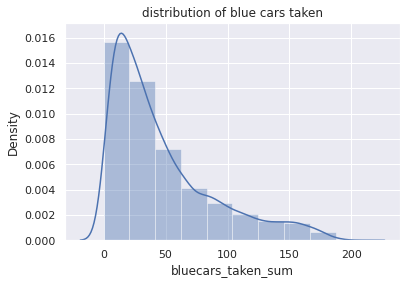

In [19]:
# Plot bluecars taken
sns.distplot(df['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'distribution of blue cars returned')

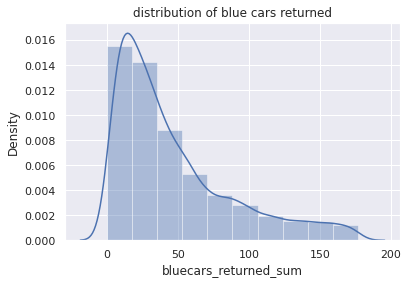

In [20]:
# Plot bluecars returned 
sns.distplot(df['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

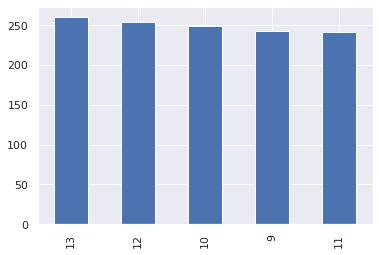

In [21]:
df['bluecars_returned_sum'].value_counts().head().plot.bar()

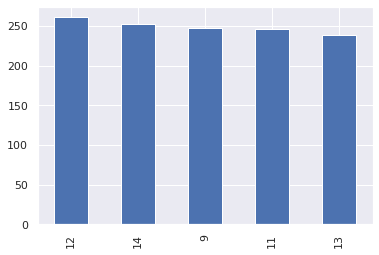

In [22]:
df['bluecars_taken_sum'].value_counts().head().plot.bar()

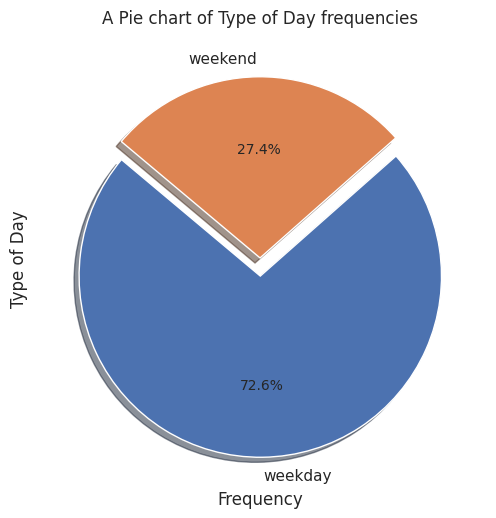

In [23]:
# Counting the day of week values
days = df.day_type.value_counts()
days

# accessing the data to plot

# Creating our labels
labels = days.index
labels

# Creating our values
df2= days.values
df2



plt.figure(figsize = (6,6), dpi = 100)
plt.pie(df2, labels = labels, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 140)
plt.ylabel("Type of Day")
plt.xlabel('Frequency')
plt.title("A Pie chart of Type of Day frequencies")
plt.show()

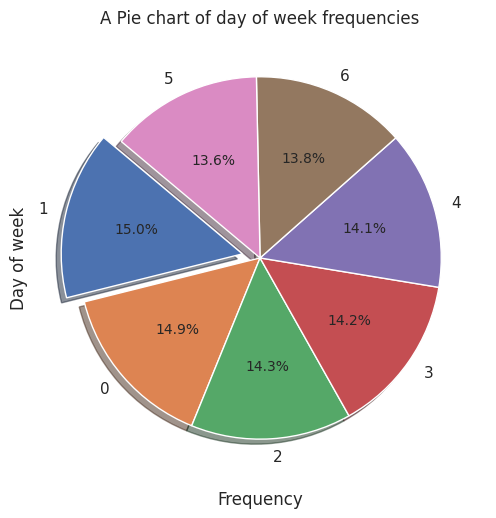

In [24]:
# Counting the day of week values
days = df.day_of_week.value_counts()
days

# accessing the data to plot

# Creating our labels
labels = days.index
labels

# Creating our values
df2= days.values
df2



plt.figure(figsize = (6,6), dpi = 100)
plt.pie(df2, labels = labels, autopct = '%1.1f%%', shadow = True, explode = (0.1,0,0,0,0,0,0), startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Pie chart of day of week frequencies")
plt.show()

In [25]:
# changing postal code to string
df3['postal_code'] = df['postal_code'].apply(str)
print(df3.dtypes)

postal_code              object
day_of_week               int64
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


In [26]:
df3['day_of_week'] = df['day_of_week'].apply(str)
print(df3.dtypes)

postal_code              object
day_of_week              object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


#Measures of central tendecy

In [27]:
#  Mean, mode and median for taken Blue Cars
print('The mean for taken cars', df.bluecars_taken_sum.mean())
print('The  median for taken cars',df.bluecars_taken_sum.median())
print('The mode for taken cars', df.bluecars_taken_sum.mode())
print('The std for taken cars', df.bluecars_taken_sum.std())

The mean for taken cars 46.85128805620609
The  median for taken cars 33.0
The mode for taken cars 0    12
dtype: int64
The std for taken cars 41.473763399185486


In [28]:
#  Mean, mode and median for Returned Blue Cars
print('The mean for returned cars', df.bluecars_returned_sum.mean())
print('The median for returned cars',df.bluecars_returned_sum.median())
print('The mode for returned cars', df.bluecars_returned_sum.mode())
print('The std for returned cars', df.bluecars_returned_sum.std())

The mean for returned cars 46.82373145979703
The median for returned cars 33.0
The mode for returned cars 0    13
dtype: int64
The std for returned cars 41.16334477293265


#Bivariate analysis


Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 864x720 with 0 Axes>

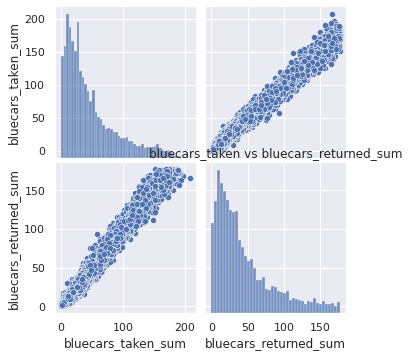

In [29]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(df[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

In [30]:
# Calculating tje pearson coefficient
coeff =  df["bluecars_taken_sum"].corr(df["bluecars_returned_sum"]) 
print(coeff)

# Positive correlation is a relationship between two variables in which 
# both variables move in tandem—that is, in the same direction.
#  Corr above .50 (positive or negative) are considered strong. 
# Since the correlation coefficent of taken and returned blue cars is 0.99, 
# this means that taken and returned are highly correlated.

0.9908674328686515


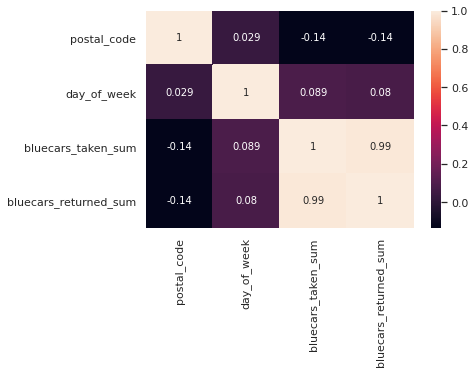

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#Implementing the solution
##hypothesis testing##

In [32]:
df. postal_code.value_counts()

94130    156
92400    156
92230    156
92270    156
92310    156
        ... 
75007      2
75014      2
75010      2
75018      2
75017      2
Name: postal_code, Length: 104, dtype: int64

In [33]:
# NORMALITY TESTS
from scipy.stats import shapiro

def shapiro_test(df3, col_list):
    for x in col_list:
        print(x)
        data = df3[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
8
        print('\n')

# shapiro Wilk's test
shapiro_test(df3, list(df3.columns))

postal_code
Statistics=0.513, p=0.000
Sample does not look Gaussian (reject H0)


day_of_week
Statistics=0.917, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_taken_sum
Statistics=0.861, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_returned_sum
Statistics=0.859, p=0.000
Sample does not look Gaussian (reject H0)




/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



#Question 1
* Hypothesis test : 
* Ho = Sum of taken cars is higher than sum of returned cars on weekdays 
*Ha = !ho

In [63]:
weekdays = df.loc[(df['day_type'] == 'weekday') ]
weekdays.head()

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


In [64]:
weekdays.shape

(9305, 5)

In [65]:
a = weekdays['bluecars_taken_sum']
b = weekdays['bluecars_returned_sum']

stats.ttest_ind(a,b)

Ttest_indResult(statistic=-0.24329299942989913, pvalue=0.8077811089564773)

In [66]:
sample_size = 3500
a_sampled = np.random.choice(weekdays['bluecars_taken_sum'], sample_size)
b_sampled = np.random.choice(weekdays['bluecars_returned_sum'], sample_size)
compare_2_groups(a_sampled, b_sampled, 0.05, sample_size)


Statistics=-0.317, p=0.751
(fail to reject H0)


In [67]:
from scipy.stats import ttest_ind
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('(fail to reject H0)')
    else:
        print('(reject H0)')

In [69]:
sample_size = 3500
a_sampled = np.random.choice(weekdays['bluecars_taken_sum'], sample_size)
b_sampled = np.random.choice(weekdays['bluecars_returned_sum'], sample_size)
compare_2_groups(a_sampled, b_sampled, 0.05, sample_size)


Statistics=-0.453, p=0.651
(fail to reject H0)


#stratified sampling

In [34]:
# Stratified sample
df4 = df.groupby('day_of_week', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df4

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
7757,92320,0,weekday,38,38
15861,95870,0,weekday,19,9
14086,94160,0,weekday,47,51
14777,94340,0,weekday,14,22
11444,93310,0,weekday,19,15
...,...,...,...,...,...
3979,91330,6,weekend,15,14
8697,92380,6,weekend,34,29
11564,93350,6,weekend,13,17
12728,93700,6,weekend,55,55


In [73]:
# pop mean
a = df['bluecars_taken_sum'].mean()
a


46.85128805620609

In [74]:
d = df['bluecars_returned_sum'].mean()
d

46.82373145979703

In [75]:
#sample mean
b = df4['bluecars_taken_sum'].mean()
b

47.62529274004684

In [76]:
e = df4['bluecars_returned_sum'].mean()
e

47.540983606557376

In [77]:
# sample standard deviation
c = df4['bluecars_taken_sum'].std()
c

41.872202709882835

In [78]:
#Question: 
#Null hypothesis: the average number of blue cars taken is not different that of the blue cars returned
#Alternative hypothesis: the average number of blue cars taken is different that of the blue cars returned
# calculating the z-score
zscore = (b-a) / c
zscore

0.018484928753415387

In [41]:
#calculating the p value
from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.5073739996873777

In [42]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [43]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['bluecars_taken_sum'].mean() - df4['bluecars_taken_sum'].mean()

-0.7740046838407508

In [44]:
import math
sample_mean = df4['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['bluecars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(42.900577035726315, 52.35000844436736)


#cluster sampling

<function matplotlib.pyplot.show>

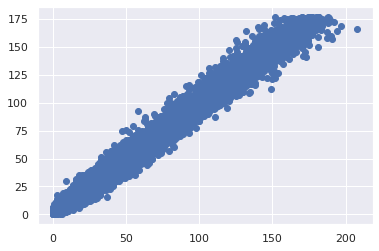

In [45]:
# cluster sampling
plt.scatter(df['bluecars_taken_sum'],df['bluecars_returned_sum'])
plt.show

In [46]:
x = df.iloc[:, 3:5]
x

,bluecars_taken_sum,bluecars_returned_sum
0,110,103
1,98,94
2,138,139
3,104,104
4,114,117
...,...,...
16080,15,10
16081,19,19
16082,33,35
16083,11,14


In [47]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [49]:
kmeans.cluster_centers_

array([[ 27.68934493,  27.76000809],
       [111.81014393, 111.44962303]])

In [50]:
kmeans.inertia_

12009111.53047935

In [51]:
# Create a copy of the data
df5 = df.copy()
# Create a new Series, containing the identified cluster for each observation
df5['Cluster'] = identified_clusters
# Check the result
df5

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,Cluster
0,75001,0,weekday,110,103,1
1,75001,1,weekday,98,94,1
2,75001,2,weekday,138,139,1
3,75001,3,weekday,104,104,1
4,75001,4,weekday,114,117,1
...,...,...,...,...,...,...
16080,95880,4,weekday,15,10,0
16081,95880,5,weekend,19,19,0
16082,95880,6,weekend,33,35,0
16083,95880,0,weekday,11,14,0


In [52]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df3)

array([[-3.41263546, -1.46558207,  1.52267775,  1.36476911],
       [-3.41263546, -0.96617776,  1.23332691,  1.14611945],
       [-3.41263546, -0.46677344,  2.19782972,  2.23936775],
       ...,
       [ 0.87000724,  1.5308438 , -0.33399016, -0.28725054],
       [ 0.87000724, -1.46558207, -0.8644667 , -0.79743308],
       [ 0.87000724, -0.96617776, -1.08147983, -1.08896596]])

In [53]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(df3,2)
gmm = pd.DataFrame(clust_labels3)
df3.insert((df3.shape[1]),'gmm',gmm)

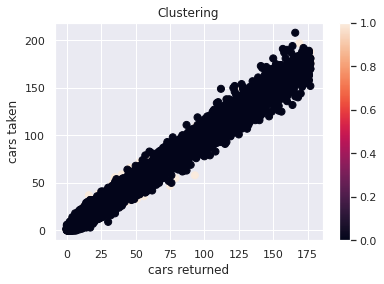

In [54]:
#Plotting the cluster obtained using GMM
from sklearn.mixture import GaussianMixture #For GMM clustering
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df3['bluecars_returned_sum'],df3['bluecars_taken_sum'],
                     c=gmm[0],s=50)
ax.set_title('Clustering')
ax.set_xlabel('cars returned')
ax.set_ylabel('cars taken')
plt.colorbar(scatter)